<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammad Mohammad Beigi

**Student ID**: 99102189


# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

### Theoretical Questions

#### 1) Derive the dual optimization problem for the Soft-Margin SVM.

The primal formulation for the Soft-Margin SVM is given as:

$
\min_{\mathbf{w}, b, \xi} \quad \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i
$

subject to:
$
y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \ldots, N
$

To derive the dual optimization problem, we introduce Lagrange multipliers $\alpha_i \geq 0$ for the inequality constraints $y_i (\mathbf{w}^T \mathbf{x}_i + b) \geq 1 - \xi_i$ and $\beta_i \geq 0$ for the inequality constraints $\xi_i \geq 0$.

The Lagrangian for this problem is:

$
L(\mathbf{w}, b, \xi, \alpha, \beta) = \frac{1}{2} \|\mathbf{w}\|^2 + C \sum_{i=1}^N \xi_i - \sum_{i=1}^N \alpha_i [y_i (\mathbf{w}^T \mathbf{x}_i + b) - 1 + \xi_i] - \sum_{i=1}^N \beta_i \xi_i
$

Taking the partial derivatives of $L$ with respect to $\mathbf{w}$, $b$, and $\xi_i$ and setting them to zero, we get:

$
\frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i = 0 \quad \Rightarrow \quad \mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i
$

$
\frac{\partial L}{\partial b} = - \sum_{i=1}^N \alpha_i y_i = 0
$

$
\frac{\partial L}{\partial \xi_i} = C - \alpha_i - \beta_i = 0 \quad \Rightarrow \quad \alpha_i + \beta_i = C
$

Substituting $\mathbf{w}$ and the condition $\alpha_i + \beta_i = C$ into the Lagrangian, we obtain the dual problem:

$
\max_{\alpha} \quad \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha_i \alpha_j y_i y_j \mathbf{x}_i^T \mathbf{x}_j
$

subject to:

$
\sum_{i=1}^N \alpha_i y_i = 0
$

$
0 \leq \alpha_i \leq C
$

#### 2) How do we calculate the weights and bias ($\mathbf{w}$ and $b$) using the dual problem optimum points?

After solving the dual problem and obtaining the optimal \(\alpha_i\), the weights $\mathbf{w}$ can be calculated as:
$
\mathbf{w} = \sum_{i=1}^N \alpha_i y_i \mathbf{x}_i
$

To find the bias $b$, we use the support vectors, which are the points for which $0 < \alpha_i < C$. For any such support vector $\mathbf{x}_k$, we can write:

$
y_k (\mathbf{w}^T \mathbf{x}_k + b) = 1 - \xi_k
$

For the support vectors, $\xi_k = 0$, hence:

$
b = y_k - \mathbf{w}^T \mathbf{x}_k
$

Averaging over all support vectors:

$
b = \frac{1}{|S|} \sum_{k \in S} \left( y_k - \mathbf{w}^T \mathbf{x}_k \right)
$

where $S$ is the set of support vectors.

#### 3) How do we classify new data points using the optimal weights and bias?

For a new data point $\mathbf{x}$, the classification is determined by the sign of the decision function:

$
f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b
$

The predicted class label $\hat{y}$ is:

$
\hat{y} = \text{sign}(f(\mathbf{x}))
$

If $f(\mathbf{x}) \geq 0$, then $\hat{y} = 1$, otherwise, $\hat{y} = -1$.

Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [ ]:

# Load datasets
df1 = pd.read_csv('/content/DF1.csv')
df2 = pd.read_csv('/content/DF2.csv')
df3 = pd.read_csv('/content/DF3.csv')

# Display the first 5 rows of each dataset
df1_head = df1.head()
df2_head = df2.head()
df3_head = df3.head()

df1_head, df2_head, df3_head

(         x1        x2  y
 0  6.462652  5.121478 -1
 1 -6.586541 -7.721287  1
 2  9.239683 -8.595738 -1
 3  4.250052  2.143755  1
 4  8.219779 -3.609733 -1,
          x1         x2  y
 0  2.937145  77.102291  1
 1 -0.029344  44.802353  1
 2  5.868818  44.595757 -1
 3  8.609281  49.223945 -1
 4  7.763276 -14.340750 -1,
          x1        x2  y
 0 -0.517768 -0.466158 -1
 1  0.940985  0.235175  1
 2 -0.470720  0.917120  1
 3  0.712716 -0.097401 -1
 4 -0.608773 -0.107034 -1)

Use the following function to visualize the datapoints for all datasets.

First 5 rows of DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

First 5 rows of DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

First 5 rows of DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1

Visualizing DF1:


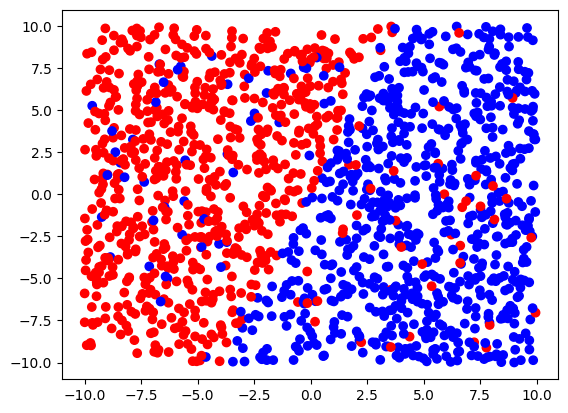


Visualizing DF2:


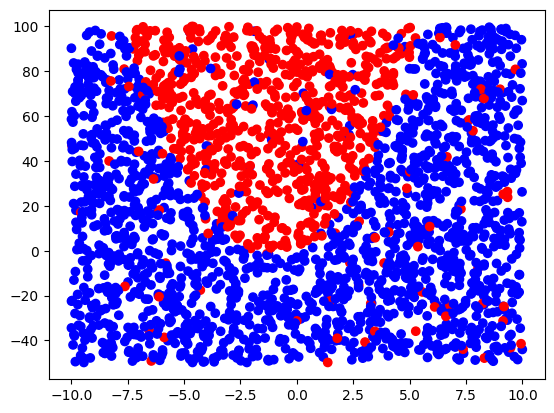


Visualizing DF3:


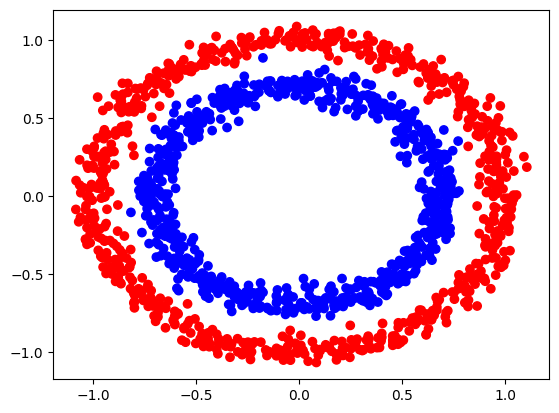

In [ ]:
# Define the visualization function
def visualize_data(X, y):
    col = []
    for i in range(len(y)):
        if y[i] == 1:
            col.append('red')
        else:
            col.append('blue')
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.show()

# Load datasets
df1 = pd.read_csv('/content/DF1.csv')
df2 = pd.read_csv('/content/DF2.csv')
df3 = pd.read_csv('/content/DF3.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of DF1:")
print(df1.head())
print("\nFirst 5 rows of DF2:")
print(df2.head())
print("\nFirst 5 rows of DF3:")
print(df3.head())

# Extract features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values
X2, y2 = df2.iloc[:, :-1].values, df2.iloc[:, -1].values
X3, y3 = df3.iloc[:, :-1].values, df3.iloc[:, -1].values

# Visualize the data points
print("\nVisualizing DF1:")
visualize_data(X1, y1)
print("\nVisualizing DF2:")
visualize_data(X2, y2)
print("\nVisualizing DF3:")
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

Based on the visualizations of the datasets, here is the appropriate kernel choice and the justification for each:

### Dataset 1 (DF1)

- **Kernel Choice**: Linear Kernel
- **Justification**: The data points in DF1 are linearly separable, as seen from the visualization. The red and blue points are separated by a straight line, making the linear kernel the most appropriate choice.

### Dataset 2 (DF2)

- **Kernel Choice**: Polynomial Kernel of degree 2
- **Justification**: The data points in DF2 are not linearly separable but have a pattern that suggests a non-linear boundary. A polynomial kernel of degree 2 can capture this non-linearity effectively, as it can model interactions between features that a linear kernel cannot.

### Dataset 3 (DF3)

- **Kernel Choice**: RBF (Radial Basis Function) Kernel
- **Justification**: The data points in DF3 form concentric circles, which are clearly not linearly separable. The RBF kernel is well-suited for such cases as it can handle complex non-linear relationships by mapping the data points into a higher-dimensional space where a linear separation is possible.


## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df1 = pd.read_csv('/content/DF1.csv')

# Extract features and labels
X1, y1 = df1.iloc[:, :-1].values, df1.iloc[:, -1].values

# Split the dataset into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Scale the data
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

# Display the shapes of the train and test sets
(X1_train_scaled.shape, X1_test_scaled.shape), (y1_train.shape, y1_test.shape)

(((1180, 2), (296, 2)), ((1180,), (296,)))

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [ ]:
import cvxpy as cp
import numpy as np
from sklearn.metrics.pairwise import linear_kernel

# Define the variables
n = X1_train_scaled.shape[0]
alpha = cp.Variable(n)

# Compute the kernel matrix (Linear Kernel in this case)
K = linear_kernel(X1_train_scaled)

# Make the kernel matrix PSD by adding a small value to the diagonal
K += np.eye(n) * 1e-6

# Define the objective function
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y1_train, alpha), K))

# Define the constraints
constraints = [cp.sum(cp.multiply(y1_train, alpha)) == 0,
               alpha >= 0,
               alpha <= 1.0]  # The C value should be chosen based on the problem. Here it is set to 1.0

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Retrieve the optimal alpha values
alpha_opt = alpha.value

# Compute the weight vector w
w = np.sum((alpha_opt * y1_train)[:, np.newaxis] * X1_train_scaled, axis=0)

# Compute the bias term b
# Use support vectors to find the bias term
support_vector_indices = np.where((alpha_opt > 1e-4) & (alpha_opt < 1.0 - 1e-4))[0]
b = np.mean(y1_train[support_vector_indices] - X1_train_scaled[support_vector_indices] @ w)

w, b


(array([-2.11074883,  0.57371611]), -0.1573711951039296)

Predict the class of each entry in the test set using your learned model.

In [ ]:
# Predict the class of each entry in the test set using the learned model
y1_test_pred = np.sign(X1_test_scaled @ w + b)

# Display the predicted classes
y1_test_pred

array([-1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
        1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1

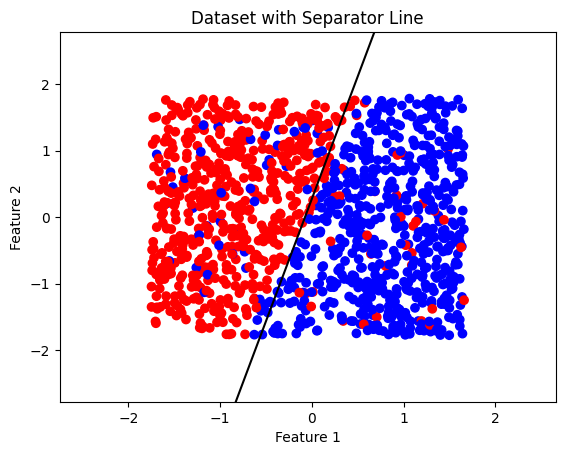

In [ ]:
# Define a function to visualize the dataset with the separator line
def visualize_with_separator(X, y, w, b):
    col = []
    for i in range(len(y)):
        if y[i] == 1:
            col.append('red')
        else:
            col.append('blue')

    plt.scatter(X[:, 0], X[:, 1], color=col)

    # Plot the separator line
    x_values = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_values = -(w[0] * x_values + b) / w[1]
    plt.plot(x_values, y_values, color='black')

    # Set axis limits
    plt.xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Dataset with Separator Line')
    plt.show()

# Visualize the dataset with the separator line
visualize_with_separator(X1_train_scaled, y1_train, w, b)


Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np


# Generate the classification report
report = classification_report(y1_test, y1_test_pred)

print(report)


              precision    recall  f1-score   support

          -1       0.92      0.93      0.92       148
           1       0.93      0.92      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [ ]:
# Load the new dataset
df2 = pd.read_csv('/content/DF2.csv')

# Splitting the dataset into features and target
X = df2.drop('y', axis=1)
y = df2['y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


((1980, 2), (496, 2), (1980,), (496,))

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [ ]:
# Define the kernel function K(x, z) = (1 + x.T @ z)^2
def polynomial_kernel(X1, X2):
    return (1 + X1 @ X2.T) ** 2

# Define the parameters
m, n = X_train_scaled.shape

# Define the kernel matrix
K = polynomial_kernel(X_train_scaled, X_train_scaled)

# Add a small value to the diagonal to ensure PSD
K += np.eye(m) * 1e-6

# Define the dual SVM problem
alpha = cp.Variable(m)
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y_train, alpha), K))
constraints = [cp.sum(cp.multiply(y_train, alpha)) == 0, alpha >= 0, alpha <= 1]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal dual variables
alpha_opt = alpha.value

# Support vectors have non-zero lagrange multipliers
support_vectors = alpha_opt > 1e-4
print(f"Number of support vectors: {np.sum(support_vectors)}")

# Compute the intercept (bias term)
b = np.mean(y_train[support_vectors] - (alpha_opt[support_vectors] * y_train[support_vectors]).dot(K[support_vectors][:, support_vectors]))

# Define the decision function for the test set
def decision_function(X):
    K_test = polynomial_kernel(X, X_train_scaled)
    return (alpha_opt * y_train).dot(K_test.T) + b

Number of support vectors: 525


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Predict the class of each entry in the test set using your learned model.

In [ ]:
# Predict the labels for the test set
y_test_pred = np.sign(decision_function(X_test_scaled))

y_test_pred

array([-1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
# Generate the classification report
report = classification_report(y_test.values, y_test_pred)
print(report)

# Print the results
print(f"Test accuracy: {np.mean(y_test_pred == y_test.values)}")

              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       336
           1       0.83      0.89      0.86       160

    accuracy                           0.90       496
   macro avg       0.89      0.90      0.89       496
weighted avg       0.91      0.90      0.90       496

Test accuracy: 0.9032258064516129


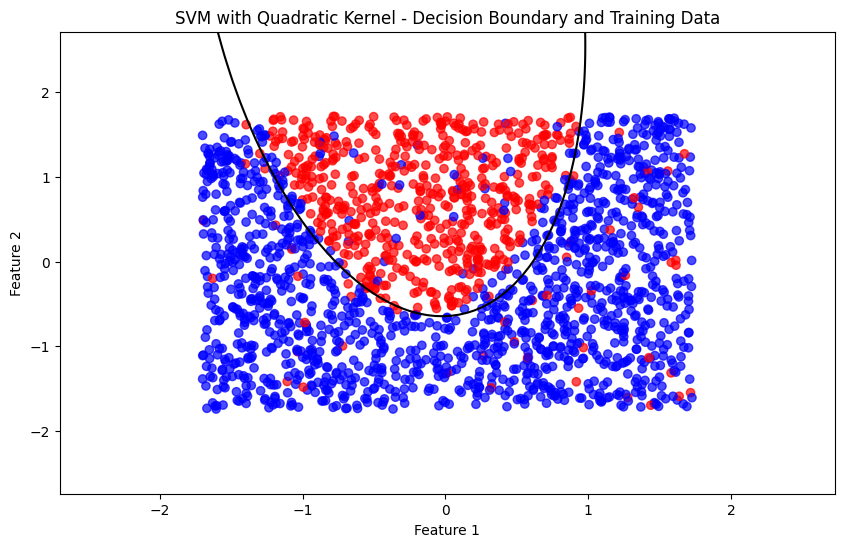

In [ ]:
import matplotlib.pyplot as plt

# Plot the data and decision boundary
plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr', alpha=0.7)

# Create a mesh to plot the decision boundary with reduced resolution
xx, yy = np.meshgrid(np.linspace(X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1, 100),
                     np.linspace(X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1, 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
Z = decision_function(X_mesh)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='k')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with Quadratic Kernel - Decision Boundary and Training Data')

plt.show()

## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [ ]:
import pandas as pd
import cvxpy as cp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df3 = pd.read_csv('/content/DF3.csv')

# Splitting the dataset into features and target
X = df3.drop('y', axis=1)
y = df3['y']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape)


((1167, 2), (292, 2), (1167,), (292,))

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [ ]:
import cvxpy as cp
import numpy as np

# Define the Gaussian (RBF) kernel function
def rbf_kernel(X1, X2, gamma=0.5):
    if X1.ndim == 1 and X2.ndim == 1:
        return np.exp(-gamma * np.linalg.norm(X1 - X2) ** 2)
    elif X1.ndim > 1 and X2.ndim == 1:
        return np.exp(-gamma * np.linalg.norm(X1 - X2, axis=1) ** 2)
    elif X1.ndim == 1 and X2.ndim > 1:
        return np.exp(-gamma * np.linalg.norm(X1 - X2, axis=1) ** 2)
    elif X1.ndim > 1 and X2.ndim > 1:
        return np.exp(-gamma * np.linalg.norm(X1[:, None] - X2[None, :], axis=2) ** 2)

# Define the parameters
m, n = X_train_scaled.shape

# Define the kernel matrix
K = np.zeros((m, m))
for i in range(m):
    for j in range(m):
        K[i, j] = rbf_kernel(X_train_scaled[i], X_train_scaled[j])

# Add a small value to the diagonal to ensure PSD
K += np.eye(m) * 1e-6

# Wrap the kernel matrix to handle PSD certification
K_psd = cp.psd_wrap(K)

# Define the dual SVM problem
alpha = cp.Variable(m)
objective = cp.Maximize(cp.sum(alpha) - 0.5 * cp.quad_form(cp.multiply(y_train, alpha), K_psd))
constraints = [cp.sum(cp.multiply(y_train, alpha)) == 0, alpha >= 0, alpha <= 1]

# Solve the problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Get the optimal dual variables
alpha_opt = alpha.value

# Support vectors have non-zero lagrange multipliers
support_vectors = alpha_opt > 1e-4
print(f"Number of support vectors: {np.sum(support_vectors)}")

# Compute the intercept (bias term)
b = np.mean(y_train[support_vectors] - (alpha_opt[support_vectors] * y_train[support_vectors]).dot(K[support_vectors][:, support_vectors]))

# Define the decision function for the test set
def decision_function(X):
    K_test = np.zeros((X.shape[0], m))
    for i in range(X.shape[0]):
        for j in range(m):
            K_test[i, j] = rbf_kernel(X[i], X_train_scaled[j])
    return (alpha_opt * y_train).dot(K_test.T) + b



Number of support vectors: 150


Predict the class of each entry in the test set using your learned model.

In [ ]:
# Predict the labels for the test set
y_test_pred = np.sign(decision_function(X_test_scaled))
y_test_pred

array([ 1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.,  1., -1.,
        1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test.values, y_test_pred)
print(report)

# Print the results
print(f"Test accuracy: {np.mean(y_test_pred == y_test.values)}")

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       152
           1       0.99      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

Test accuracy: 0.9965753424657534


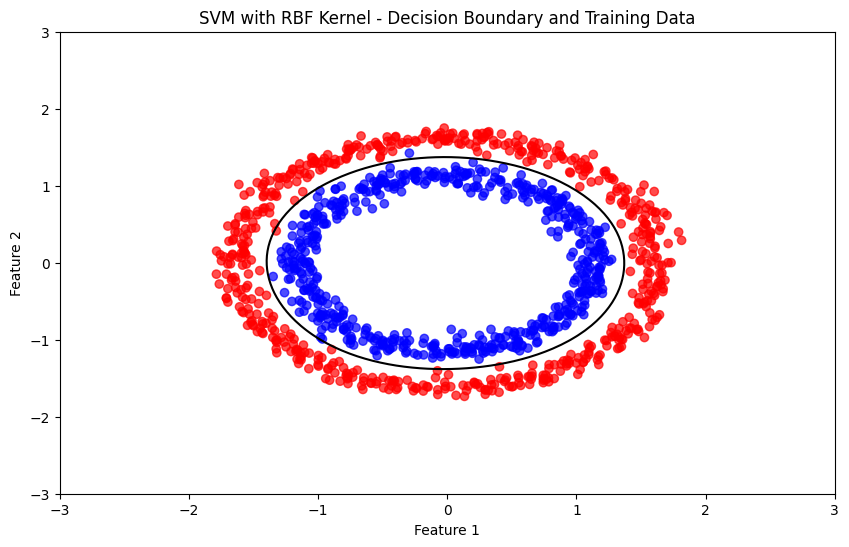

In [ ]:
import matplotlib.pyplot as plt

# Plot the data and decision boundary
plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr', alpha=0.7)

# Create a mesh to plot the decision boundary with reduced resolution
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
X_mesh = np.c_[xx.ravel(), yy.ravel()]
Z = decision_function(X_mesh)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0], colors='k')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM with RBF Kernel - Decision Boundary and Training Data')

plt.show()
